<a href="https://colab.research.google.com/github/MeghaUkkali9/Advanced-Machine-Learing/blob/master/Project4_MeghaUkkali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project#: 1
Name: Megha Ukkali
Course: Advanced Machine Learning
Submission Date: 01/29/2020

Project 1
3) Download the Wine data set from https://archive.ics.uci.edu/ml/datasets/Wine (Links to an external site.) and create a new Jupytor notebook to perform the following tasks:
a) --Plot the classification data against each of the attributes

b) -- Which attribute has the highest correlation with the classification  label?

c) -- Repeat all the experiments in 02_end_to_end_machine_learning_project.ipynb but use the Wine data set instead the housing data

Upload the wine dataset from the git hub

In [0]:
import os
import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/MeghaUkkali9/Advanced-Machine-Learing/master/"
PRSA_PATH = os.path.join("datasets", "PRSA")
PRSA_URL = DOWNLOAD_ROOT + "datasets/PRSA/PRSA_data_2010.1.1-2014.12.31.csv"

def fetch_prsadata_data(prsadata_url=PRSA_URL, prsadata_path=PRSA_PATH):
    if not os.path.isdir(prsadata_path):
        os.makedirs(prsadata_path)
    tgz_path = os.path.join(prsadata_path, "PRSA_data_2010.1.1-2014.12.31.csv")
    urllib.request.urlretrieve(prsadata_url, tgz_path)

In [0]:
fetch_prsadata_data()

Load the .csv file of prsa dataset

In [0]:
import pandas as pd

def load_prsadata_data(prsadata_path=PRSA_PATH):
    csv_path = os.path.join(prsadata_path, "PRSA_data_2010.1.1-2014.12.31.csv")
    return pd.read_csv(csv_path)

In [4]:
prsadata = load_prsadata_data()
prsadata.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
prsadata.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [6]:
prsadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [7]:
prsadata["cbwd"].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

In [8]:
prsadata.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [0]:
prsadata=prsadata.drop("No", axis=1)

a) PLOT THE CLASSIFICATION DATA FOR EACH ATTRIBUTE

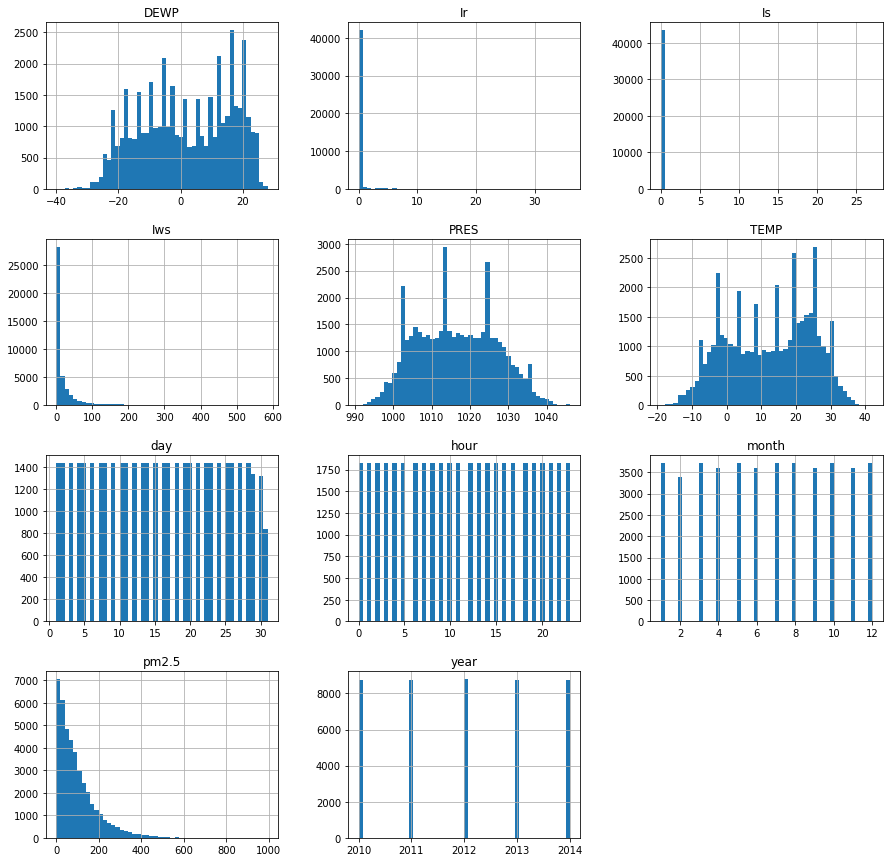

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
prsadata.hist(bins=50, figsize=(15,15))
plt.show()

In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(prsadata, 0.2)
len(train_set)

35060

In [14]:
len(test_set)

8764

In [0]:
median = prsadata["pm2.5"].median()
prsadata["pm2.5"].fillna(median, inplace=True) 

In [16]:
prsadata.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,97.357977,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,90.030249,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [17]:
prsadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    43824 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 4.0+ MB


In [0]:
# to make this notebook's output identical at every run
import numpy as np

np.random.seed(42)

In [0]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(prsadata, test_ratio):
    shuffled_indices = np.random.permutation(len(prsadata))
    test_set_size = int(len(prsadata) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return prsadata.iloc[train_indices], prsadata.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(prsadata, 0.2)
len(train_set)

35060

In [21]:
train_set.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
15079,2011,9,21,7,58.0,8,12.0,1017.0,NW,14.76,0,0
6670,2010,10,5,22,152.0,13,16.0,1013.0,SE,1.79,0,0
23445,2012,9,3,21,9.0,8,16.0,1015.0,NW,66.15,0,0
24928,2012,11,4,16,23.0,0,4.0,1013.0,NW,200.74,0,31
1588,2010,3,8,4,63.0,-5,-4.0,1038.0,SE,10.29,3,0


In [22]:
len(test_set)

8764

In [23]:
test_set.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
21656,2012,6,21,8,193.0,19,25.0,1005.0,cv,1.78,0,0
1570,2010,3,7,10,57.0,-10,-2.0,1035.0,SE,4.92,0,0
35359,2014,1,13,7,106.0,-19,-11.0,1033.0,NW,1.79,0,0
22943,2012,8,13,23,47.0,19,20.0,1009.0,SE,4.47,0,0
32622,2013,9,21,6,34.0,15,18.0,1016.0,cv,0.45,0,0


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(prsadata, test_size=0.2, random_state=42)

In [25]:
len(test_set)

8765

In [26]:
len(train_set)

35059

In [27]:
test_set.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
21656,2012,6,21,8,193.0,19,25.0,1005.0,cv,1.78,0,0
1570,2010,3,7,10,57.0,-10,-2.0,1035.0,SE,4.92,0,0
35359,2014,1,13,7,106.0,-19,-11.0,1033.0,NW,1.79,0,0
22943,2012,8,13,23,47.0,19,20.0,1009.0,SE,4.47,0,0
32622,2013,9,21,6,34.0,15,18.0,1016.0,cv,0.45,0,0


In [28]:
prsadata["cbwd"].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

In [29]:
 from sklearn.preprocessing import LabelEncoder
 encoder = LabelEncoder()
 train_set['cbwd'] = encoder.fit_transform(train_set['cbwd'].astype('str')) 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
test_set['cbwd'] = encoder.fit_transform(test_set['cbwd'].astype('str')) 
test_set.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
21656,2012,6,21,8,193.0,19,25.0,1005.0,3,1.78,0,0
1570,2010,3,7,10,57.0,-10,-2.0,1035.0,2,4.92,0,0
35359,2014,1,13,7,106.0,-19,-11.0,1033.0,1,1.79,0,0
22943,2012,8,13,23,47.0,19,20.0,1009.0,2,4.47,0,0
32622,2013,9,21,6,34.0,15,18.0,1016.0,3,0.45,0,0


In [31]:
train_set.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
6670,2010,10,5,22,152.0,13,16.0,1013.0,2,1.79,0,0
23445,2012,9,3,21,9.0,8,16.0,1015.0,1,66.15,0,0
24928,2012,11,4,16,23.0,0,4.0,1013.0,1,200.74,0,31
1588,2010,3,8,4,63.0,-5,-4.0,1038.0,2,10.29,3,0
9737,2011,2,10,17,79.0,-4,-3.0,1027.0,2,87.19,19,0


**Prepare the data for Machine Learning algorithms**

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(train_set)

In [33]:
X_train_reduced.shape

(35059, 3)

In [0]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [35]:
d

3

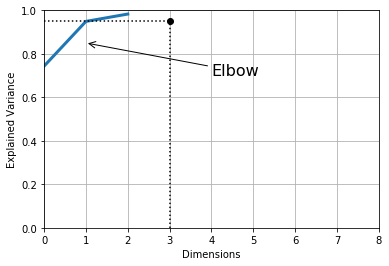

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 8, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(1, 0.85), xytext=(4, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

In [50]:
np.sum(pca.explained_variance_ratio_)

0.9830476302257071

#linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_